# Housing Kaggle

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Cleaning Train Dataset

In [2]:
train_filepath = "C:/Users/PIYUSH/OneDrive/Desktop/Kaggle/HousePrices/train.csv"
train_data = pd.read_csv(train_filepath)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# train_data.info()

In [4]:
# list(train_data.columns)

In [5]:
# train_data.isnull().sum()
train_data["FireplaceQu"].isnull().sum()

690

In [6]:
train_data = train_data.drop("Alley", axis = 'columns')
train_data = train_data.drop("PoolQC", axis = 'columns')
train_data = train_data.drop("Fence", axis = 'columns')
train_data = train_data.drop("MiscFeature", axis = 'columns')
train_data = train_data.drop("FireplaceQu", axis = 'columns')
train_data = train_data.drop("Id", axis = 'columns')

<AxesSubplot:>

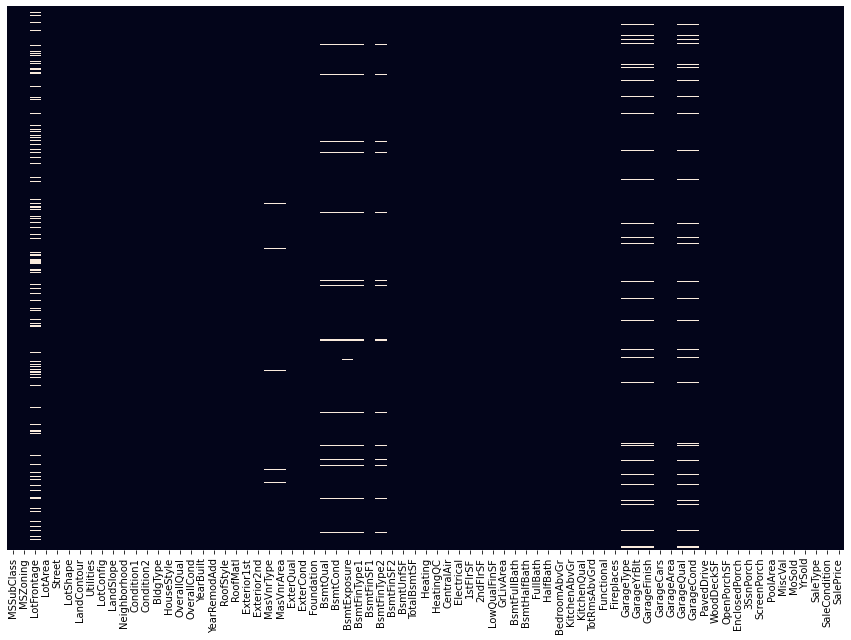

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.isnull(), yticklabels = False, cbar=False)

In [8]:
train_data.shape

(1460, 75)

In [9]:
# train_data.info()

In [10]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [11]:
train_data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [12]:
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])

In [13]:
train_data['BsmtQual'] = train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])

In [14]:
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])

In [15]:
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])

In [16]:
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])

In [17]:
train_data['GarageType'] = train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])

In [18]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())

In [19]:
train_data['GarageFinish'] = train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0]) 
train_data['GarageQual'] = train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0]) 
train_data['GarageCond'] = train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0]) 

In [20]:
train_data['MasVnrType'] = train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())
train_data.dropna(inplace=True)

###  Cleaning Test Data Set


In [21]:
test_filepath = "C:/Users/PIYUSH/OneDrive/Desktop/Kaggle/HousePrices/test.csv"
test_data = pd.read_csv(test_filepath)
test_data.shape

(1459, 80)

In [22]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [24]:
test_data = test_data.drop("Alley", axis = 'columns')
test_data = test_data.drop("PoolQC", axis = 'columns')
test_data = test_data.drop("Fence", axis = 'columns')
test_data = test_data.drop("MiscFeature", axis = 'columns')
test_data = test_data.drop("FireplaceQu", axis = 'columns')
# test_Id = test_data["Id"]
# test_data = test_data.drop("Id", axis = 'columns')

<AxesSubplot:>

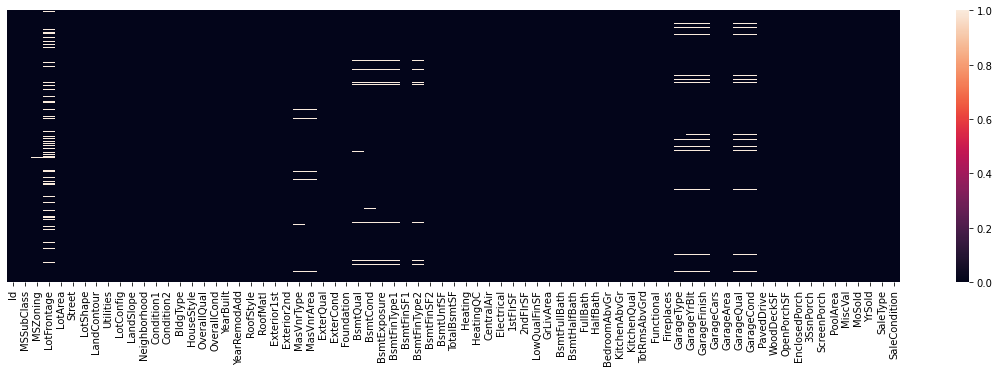

In [25]:
plt.figure(figsize = (20,5))
sns.heatmap(test_data.isnull(), yticklabels = False)

In [26]:
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['BsmtCond'] = test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual'] = test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['GarageType'] = test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())

In [27]:
test_data['GarageFinish'] = test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0]) 
test_data['GarageQual'] = test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0]) 
test_data['GarageCond'] = test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])

In [28]:
test_data['MasVnrType'] = test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())

In [29]:
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])

<AxesSubplot:>

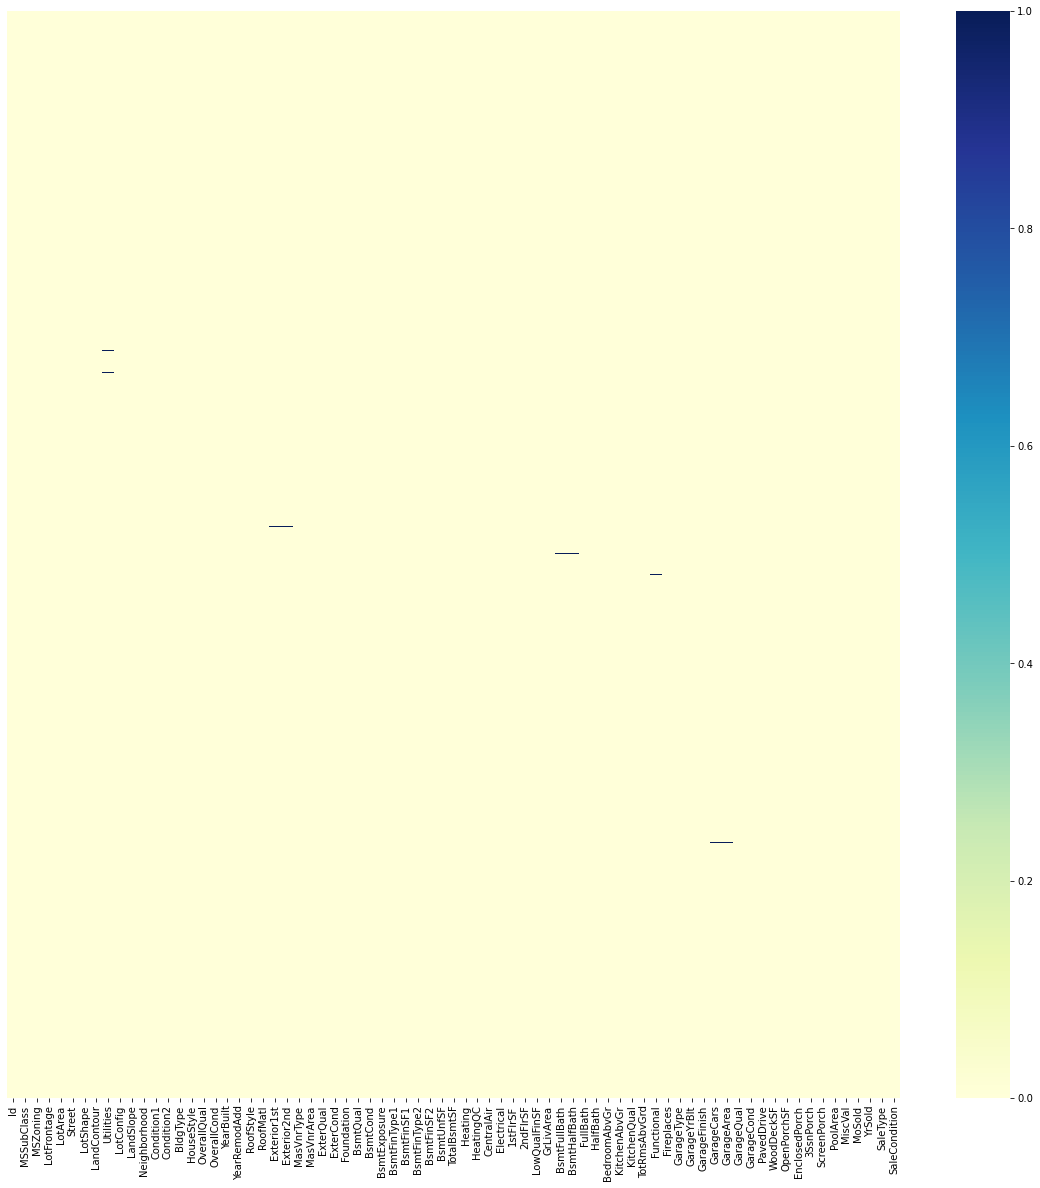

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(test_data.isnull(), yticklabels = False, cmap='YlGnBu')
# test_data.dropna(inplace=True)

In [31]:
test_data["GarageArea"] = test_data["GarageArea"].fillna(test_data["GarageArea"].mean())

In [32]:
test_data["GarageCars"] = test_data["GarageCars"].fillna(test_data["GarageCars"].mean())

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [34]:
# # 33  BsmtFinSF1     1458 non-null   float64
# #  34  BsmtFinType2   1459 non-null   int32  
# #  35  BsmtFinSF2     1458 non-null   float64
# #  36  BsmtUnfSF      1458 non-null   float64
# #  37  TotalBsmtSF    1458 non-null   float64
# 46  BsmtFullBath   1457 non-null   float64
#  47  BsmtHalfBath   1457 non-null   float64

In [35]:
test_data["BsmtFinSF1"] = test_data["BsmtFinSF1"].fillna(test_data["BsmtFinSF1"].mean())
test_data["BsmtFinSF2"] = test_data["BsmtFinSF2"].fillna(test_data["BsmtFinSF2"].mean())
test_data["BsmtUnfSF"] = test_data["BsmtUnfSF"].fillna(test_data["BsmtUnfSF"].mean())
test_data["TotalBsmtSF"] = test_data["TotalBsmtSF"].fillna(test_data["TotalBsmtSF"].mean())
test_data["BsmtFullBath"] = test_data["BsmtFullBath"].fillna(test_data["BsmtFullBath"].mean())
test_data["BsmtHalfBath"] = test_data["BsmtHalfBath"].fillna(test_data["BsmtHalfBath"].mean())

<AxesSubplot:>

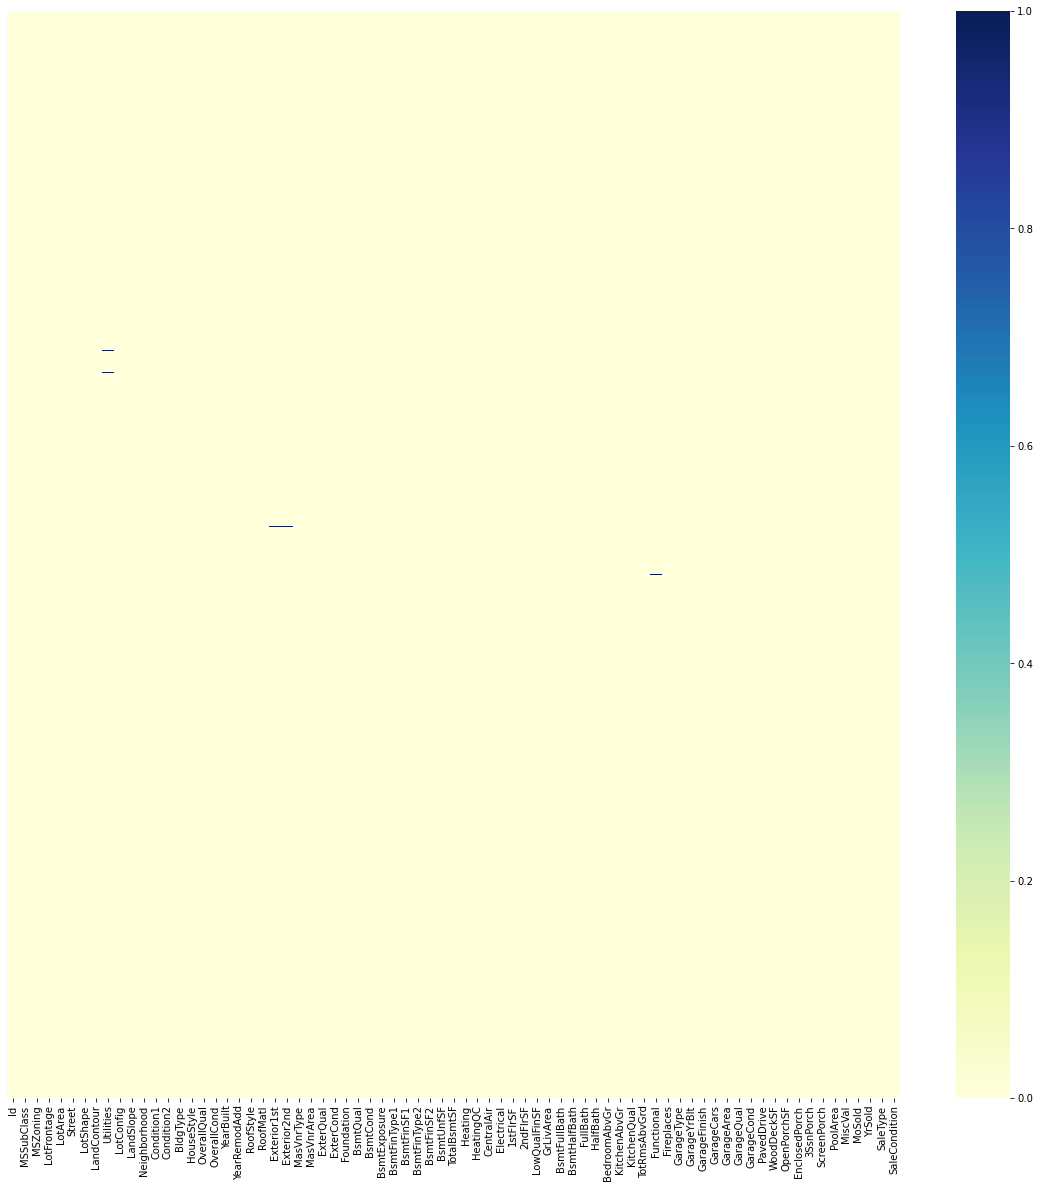

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(test_data.isnull(), yticklabels = False, cmap='YlGnBu')

#### Encoding Categorical Data with LabelEncoder()

In [37]:
# train_data.info()

In [38]:
list(train_data.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',

In [39]:
category_column =['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SaleType','SaleCondition','SalePrice']
len(category_column)

75

In [40]:
from sklearn.preprocessing import LabelEncoder
category_column =['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'MasVnrType', 'Electrical', 'BsmtFinType1', 'ExterQual']

for c in category_column:
  le = LabelEncoder()
  train_data[c]= le.fit_transform(train_data[c].values)

In [41]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [42]:
from sklearn.preprocessing import LabelEncoder
category_column =['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'MasVnrType', 'Electrical', 'BsmtFinType1', 'ExterQual']

for c in category_column:
  le = LabelEncoder()
  test_data[c]= le.fit_transform(test_data[c].values)

In [43]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


## Data Visualization

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

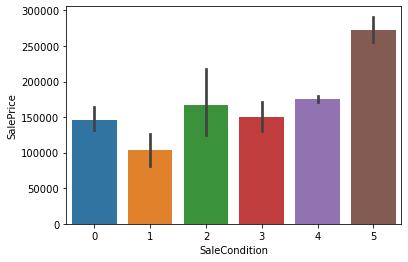

In [44]:
sns.barplot(x = train_data['SaleCondition'], y=train_data['SalePrice'])

<AxesSubplot:>

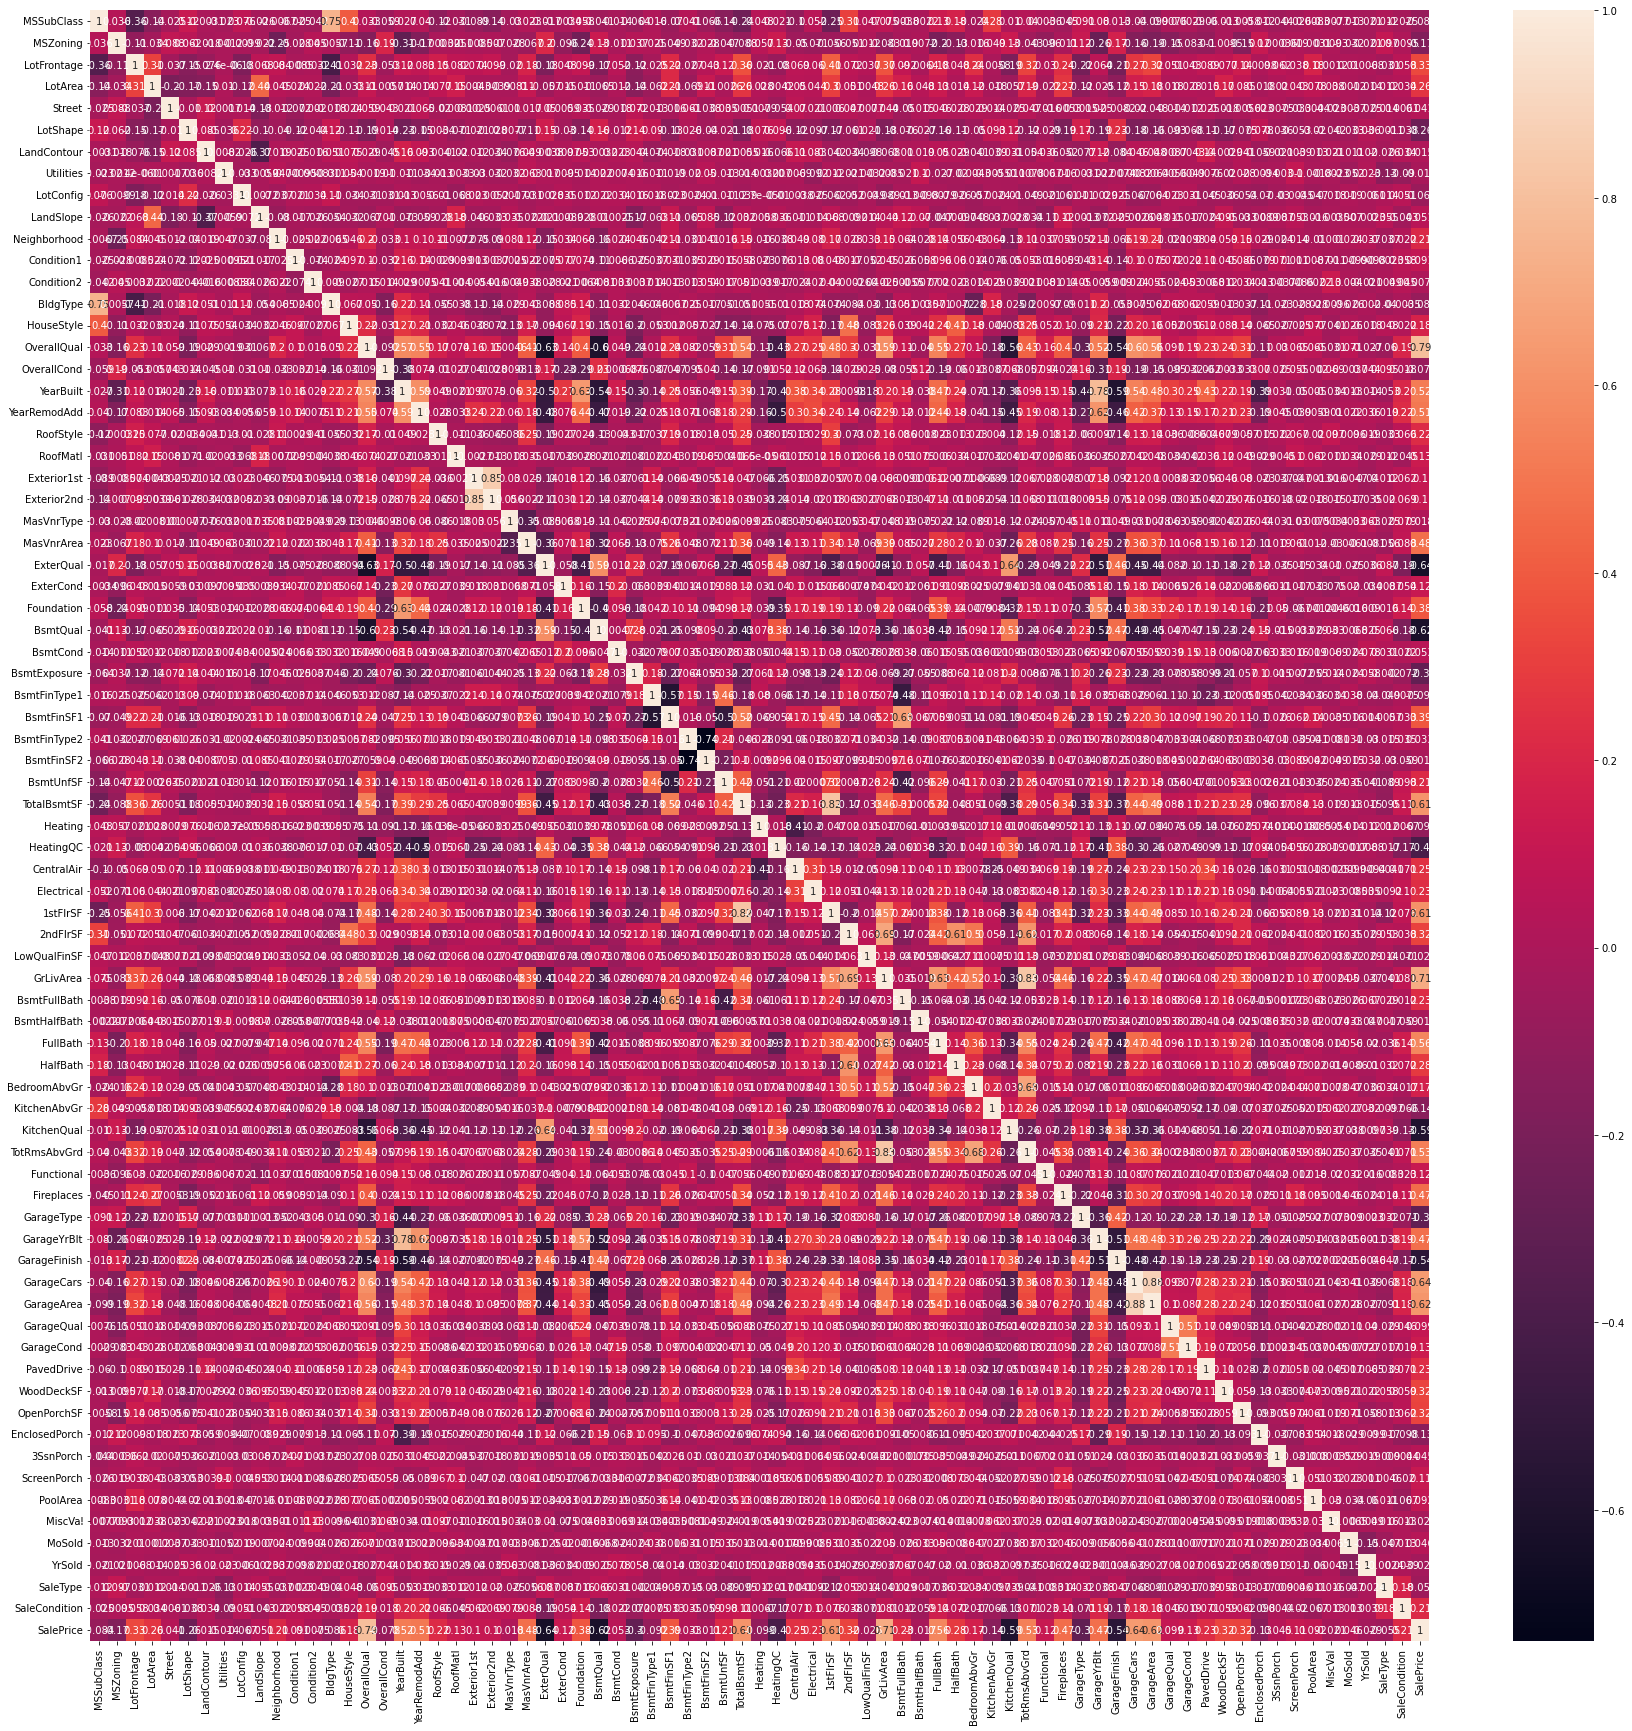

In [45]:
plt.figure(figsize=(30,30))
sns.heatmap(train_data.corr(), annot = True)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

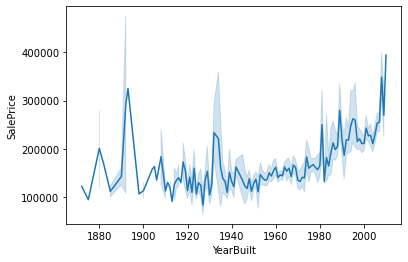

In [46]:
sns.lineplot(y=train_data['SalePrice'], x=train_data['YearBuilt'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

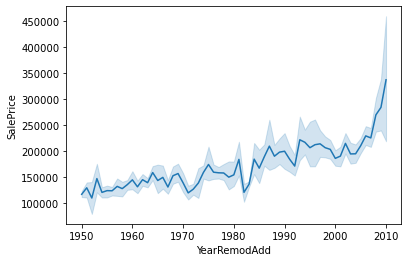

In [47]:
sns.lineplot(y=train_data['SalePrice'], x=train_data['YearRemodAdd'])

## Spliting Train & Test dataset

In [48]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [49]:
train_data.shape

(1459, 75)

In [50]:
X_train = train_data.drop("SalePrice", axis = 1)
Y_train = train_data["SalePrice"]
X_test  = test_data.drop("Id", axis = 1)

In [51]:
Y_train.shape

(1459,)

## Model Training

In [52]:
from sklearn import linear_model

In [53]:
model = linear_model.LinearRegression()

In [54]:
model.fit(X_train,Y_train)

LinearRegression()

In [55]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [56]:
Y_predict = model.predict(X_test)


# 

In [57]:
from sklearn.metrics import accuracy_score
model.score(X_train, Y_train)
model = round(model.score(X_train, Y_train) * 100, 2)
model

84.95

In [58]:
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": Y_predict
    })


In [59]:
submission.to_csv('housing.csv', index=False)

In [60]:
len(Y_predict)

1459